<h2 style="color:green">Predicting if a person would buy life insurnace based on his age using binomial logistic regression</h2>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [15]:
df.isna().sum()

age                 0
bought_insurance    0
dtype: int64

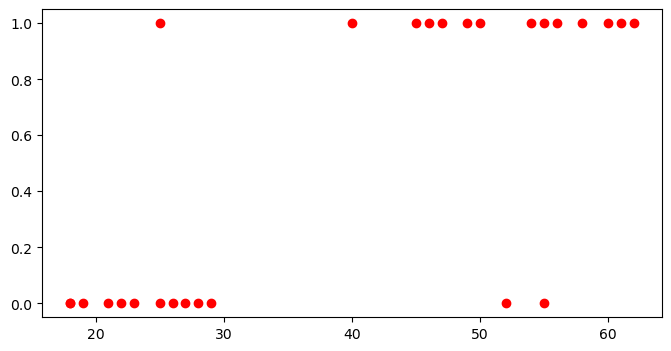

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(df.age,df.bought_insurance,color='red')

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.2, random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_predicted = model.predict(X_test)

In [21]:
y_predicted

array([1, 1, 0, 1, 1, 0], dtype=int64)

In [23]:
X_test

,age
17,58
14,49
18,19
3,52
23,45
10,18


In [22]:
y_test

17    1
14    1
18    0
3     0
23    1
10    0
Name: bought_insurance, dtype: int64

### Compare between Original value and Predocted Value

In [27]:
pd.DataFrame(np.c_[X_test,y_test,y_predicted],columns=['Age','Original Value','Predicted Value'])

,Age,Original Value,Predicted Value
0,58,1,1
1,49,1,1
2,19,0,0
3,52,0,1
4,45,1,1
5,18,0,0


In [28]:
model.score(X_test,y_test) * 100

83.33333333333334

## Formula:-

<img src='simLinear.png' height='600' width='400'>

**model.coef_ indicates value of m in y=b*x + a equation**

In [35]:
model.coef_ #b

array([[0.14617537]])

**model.intercept_ indicates value of b in y=b*x + a equation**

In [36]:
model.intercept_ #a

array([-5.48985094])

In [31]:
model.predict([[60]])

array([1], dtype=int64)

<img src='formula.png' png height='600' width='400'>

**Lets defined sigmoid function now and do the math with hand:-**

In [20]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x)) #Exponential e^x

In [21]:
def prediction_function(age):
    z = 0.14617537 * age - 5.48985094
    y = sigmoid(z)
    
    if y<0.5:
        return 0
    else:
        return 1

In [23]:
prediction_function(28)

0